# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Необходимо определить, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

Исследование проводится на основе данных файла data.csv, в котором находится информация о клиентах банка по следующим пунктам:

- `children` — количество детей в семье
- `days_employed` — общий трудовой стаж в днях
- `dob_years` — возраст клиента в годах
- `education` — уровень образования клиента
- `education_id` — идентификатор уровня образования
- `family_status` — семейное положение
- `family_status_id` — идентификатор семейного положения
- `gender` — пол клиента
- `income_type` — тип занятости
- `debt` — имел ли задолженность по возврату кредитов
- `total_income` — ежемесячный доход
- `purpose` — цель получения кредита

**Содержание проекта**:

1. [Знакомство с данными и изучение общей информации](#open)
2. [Предобработка данных](#pre)
    * [Обработка пропущенных значений](#pre_1)
    * [Замена типа данных](#pre_2)
    * [Обработка дубликатов](#pre_3)
    * [Лемматизация](#pre_4)
    * [Категоризация данных](#pre_5)
    
    
3. [Ответы на вопросы](#answer)
4. [Общий вывод](#conc)
5. [Чек-лист](#check)
    
    

<a id="open"></a>
##  Знакомство с данными и изучение общей информации

In [1]:
# Импортирование библиотеки pandas.
import pandas as pd

# Импортирование библиотеки pyplot.
from matplotlib import pyplot as plt

# Импортирование библиотеки Mystem.
from pymystem3 import Mystem
m = Mystem()

# Прочтение файла .csv и сохранение данных в датафрейм df.
df = pd.read_csv('/Users/yanako/MyDrive/COURSES/YANDEX_ANALITICS/02_Предобработка_данных/проект/data.csv')

# Вывод на экран первых 15-ти строк датафрейма.
display(df.head(15))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [2]:
# Изучение общей информации о данных.
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**Вывод**

Каждая строка таблицы описывает одного клиента, указывая его пол, возраст, семейное положение, количество детей, стаж работы, уровень и тип дохода, уровень образования, а также цель кредита и наличие или отсутствие задолжностей по возврату кредита. Отдельные столбцы введены для индикаторов семейного положения и уровня образования.

В таблице более 20 тысяч строк и 12 столбцов. В столбцах `days_employed` и `total_income` одинаковое количество пропусков - около 10% от общего числа значений столбцов, в обоих столбцах тип данных - float. Возможно, некоторые клиенты не указали уровень дохода и стаж работы или произошла ошибка на каком-то из последующих этапов сбора данных. Значения в `days_employed` выглядят подозрительно - большинство значений отрицательные, а положительные значения на порядки выше отрицательных.

<a id="pre"></a>
## Предобработка данных

<a id="pre"></a>
### Обработка пропущенных значений

In [3]:
# Подсчет пропущенных значений в данных.
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Можно предположить, что пропущенные значения в столбцах `days_employed` и `total_income` находятся в одних и тех же строках. Проверим это предположение:

In [4]:
# Создание списка индексов записей по параметру.
t_i = df[df['total_income'].isna() == True].index.tolist()
d_e = df[df['days_employed'].isna() == True].index.tolist()

# Проверка соответствия одного списка другому.
t_i == d_e

True

Действительно, в датафрейме нет ни одной строки, в которой пропуск в одном столбце не сопровождается пропуском в другом. 

Оба столбца с пропусками хранят в себе количественные переменные типа float. Прежде чем решить как именно поступать с пропусками в этих столбцах, посмотрим на распределение данных в обоих столбцах. 

Так как мне важно оценить данные перед началом обработки, я напишу функцию, которая будет показывать среднее, медианное, минимальное и максимальное значение в заданном столбце, а также выводить на экран график распределения данных.

In [5]:
def col_check_distrib(column, hist_bins=100, hist_div_factor=1, categories="cat", values="val"):
    '''
    Функция проверяет распределение данных в заданном столбце датафрейма и
    выводит на экран название столбца, его минимальное, среднее, медианное и максимальное значения.
    А также показывает график распределения данных.
    
    '''
    print("column : " + column + "\n" +
          "min = " + str(df[column].min()) + "\n" +
          "mean = " + str(df[column].mean()) + "\n" +
          "median = " + str(df[column].median()) + "\n" +
          "max = " + str(df[column].max())
    )
    plt.hist((df[column]/hist_div_factor), bins = hist_bins)
    
    plt.title(f'Распределение данных в столбце {column}')
    plt.xlabel(f'{categories}')
    plt.ylabel(f'{values}')
    plt.show()

Для начала оценим данные в столбце `days_employed`, для наглядности выведем на экран рабочий стаж в годах (разделим количество дней в столбце на 365):

column : days_employed
min = -18388.949900568383
mean = 63046.49766147338
median = -1203.369528770489
max = 401755.40047533


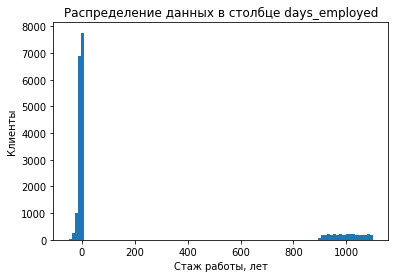

In [6]:
# Применение функции col_check_distrib для столбца days_employed.
col_check_distrib(
    column='days_employed', 
    hist_bins=100, 
    hist_div_factor=365, 
    categories="Стаж работы, лет", 
    values="Клиенты")

Мы видим, что данные из столбца со стажем работы распределены неадекватно: часть значений отрицательная, другая часть находится в районе тысячи лет. Медианное значение отрицательное и очень сильно отличается от среднего значения. Очевидно, что такими данным пользоваться нельзя, и сделать обоснованное предположение о качественном преобразовании таких данных почти невозможно. В данном случае нужно обратиться к заказчику за уточнением. 

Для текущего исследования рабочий стаж не имеет значения, поэтому столбец со стажем работы можно было бы оставить без изменений, но, так как далее я буду приводить данные из вещественных к целочисленным значениям, то сейчас я заполню значения NaN нулями (помня о том, что пользоваться этими данными для расчетов я не буду):

In [7]:
# Замена значений NaN на 0.
df['days_employed'] = df['days_employed'].fillna(0)

# Проверка результата: подсчет значений NaN.
df['days_employed'].isna().sum()

0

Все пропуски в столбце со стажем работы заполнены.

Оценим ситуацию со значениями в столбце с ежемесячным доходом 'total_income':

column : total_income
min = 20667.26379327158
mean = 167422.30220817294
median = 145017.93753253992
max = 2265604.028722744


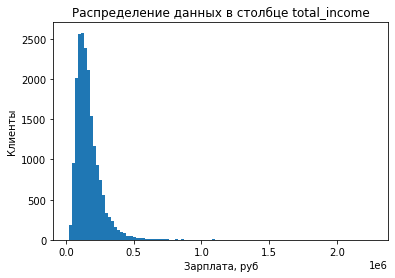

In [8]:
# Применение функции col_check_distrib для столбца days_employed.
col_check_distrib(
    column='total_income', 
    hist_bins=100, 
    hist_div_factor=1, 
    categories="Зарплата, руб", 
    values="Клиенты")

Здесь данные распределены более правдоподобно, но мы видим, что максимальная зарплата на порядок выше большинства значений, что может говорить об ошибке и сказываться на расчетах. Мы также видим существенную разницу между средним и медианным значением - больше 20000 р.

Есть вероятность, что выбивающиееся из общего паттерна значения - результат ошибки ввода данных. Посмотрим, сколько всего значений в столбце 'total_income' превышает отметку в 500000 р.

In [9]:
# Подсчет количества выдающихся значений в столбце total_income.
df[df['total_income'] > 500000]['total_income'].count() 

222

Таких значений 222, что составляет около 1% от общего количества строк. Мы можем сказать, что независимо от того, как мы решим поступить с выдающимися данными, на общие выводы данного исследования они не должны оказать серьезного влияния. (Хотя при группировке по уровню зарплаты вполне могут иметь вес).

Для того, чтобы понять, случайны ли пропуски в столбце с доходом или же прослеживается какая-то закономерность, посмотрим, как они соотносятся с данными в других столбцах: возможно, есть зависимость между типом дохода (или полом, образованием и тд.) и пропусками. Для проверки этого предположения выведем первые строки с пропусками на экран:

In [10]:
# Вывод на экран 20-ти первых строк с пропущенными значениямии.
df[df['total_income'].isna()].head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,0.0,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,0.0,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,0.0,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,0.0,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,0.0,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
65,0,0.0,21,среднее,1,Не женат / не замужем,4,M,компаньон,0,NaN,операции с коммерческой недвижимостью
67,0,0.0,52,высшее,0,женат / замужем,0,F,пенсионер,0,NaN,покупка жилья для семьи
72,1,0.0,32,высшее,0,женат / замужем,0,M,госслужащий,0,NaN,операции с коммерческой недвижимостью
82,2,0.0,50,высшее,0,женат / замужем,0,F,сотрудник,0,NaN,жилье
83,0,0.0,52,среднее,1,женат / замужем,0,M,сотрудник,0,NaN,жилье


Очевидных закономерностей между строками с пропусками и данными в других столбцах на первый взгляд не прослеживается. Мы видим, что клиенты с пропуском в графе дохода имеют разный уровень образования, возраст, пол и должность.

В каждом столбце выведенной таблицы присутствуют самые разные значения, поэтому можно назвать пропуски в столбце  'total_income' случайными.

Данные о доходе пропущены примерно в 10% данных, при этом строки с пропусками содержат важную для итогового вывода информацию - количество детей, семейное положение и наличие или отсутствие задолжности. 

Посмотрим на распределение данных по типу дохода, используя один из столбцов, в котором нет пропусков ('education'):

In [11]:
# Подсчет клиентов в каждой категории дохода.
df.groupby('income_type')['education'].count()

income_type
безработный            2
в декрете              1
госслужащий         1459
компаньон           5085
пенсионер           3856
предприниматель        2
сотрудник          11119
студент                1
Name: education, dtype: int64

Мы видим непропорциональное разделение клиентов по группам. Только 4 из 8 групп представляют статистическую ценность.

In [12]:
# Подсчет медианного значения для каждой категории дохода.
income_types = df.groupby('income_type')['total_income'].median()
# Вывод на экран медианных значений по группам дохода.
income_types

income_type
безработный        131339.751676
в декрете           53829.130729
госслужащий        150447.935283
компаньон          172357.950966
пенсионер          118514.486412
предприниматель    499163.144947
сотрудник          142594.396847
студент             98201.625314
Name: total_income, dtype: float64

Заменим пропуски в столбце 'total_income' медианными значениями по типу дохода:

In [13]:
# Перебор медианных значений по группам дохода и заполнение пропусков в total_income.
for inc_type in income_types.index:
    df.loc[(df['income_type'] == inc_type) & 
           (df['total_income'].isna()), 
           'total_income'] = income_types[inc_type]
    
# Вывод информации о таблице.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Теперь все значения в столбце 'total_income' имеют числовые значения.

Проверим распределение данных в других столбцах, которые нам понадобятся для расчетов. 

column : children
min = -1
mean = 0.5389082462253194
median = 0.0
max = 20


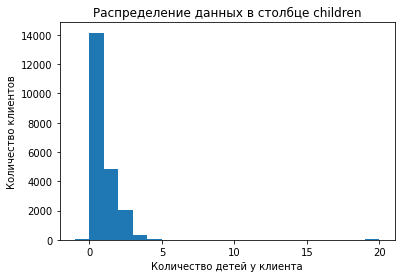

In [14]:
# Применение функции col_check_distrib для столбца children.
col_check_distrib(
    column='children', 
    hist_bins=21, 
    hist_div_factor=1, 
    categories="Количество детей у клиента", 
    values="Количество клиентов")

Мы видим странные значения в данных: -1 и 20. Подсчитаем, сколько всего таких значений в данных: 

In [15]:
# Подсчет значений, сгруппированных по количеству детей.
df.groupby('children')['education'].count()

children
-1        47
 0     14149
 1      4818
 2      2055
 3       330
 4        41
 5         9
 20       76
Name: education, dtype: int64

Согласно нашим данным, у 76-ти клиентов банка по 20 детей. Это очень маловероятно, особенно учитывая тот факт, что ни у кого нет, например 15-ти или 9-ти детей (значения от 6 до 19 включительно не присутствуют в таблице). Таким образом, можно сделать вывод, что число 20 является следствием ошибки ввода и, скорее всего, детей у этих клиентов по двое.

Значение '-1' могло появиться в таблице при отсутствии достоверной информации о количестве детей. Но также возможно, что это ошибка ввода и вместо '-1' имелось ввиду '1'. Таким образом есть два варианта обработки этих значений.

Допустим, что это именно ошибка ввода, и, так как общее количество значений '-1'(47) составляет менее 1% от значений '1'(4809), на итоговые расчеты это не окажет значительного влияния. Заменим значения в столбце с количеством детей с '-1' на '1' и с '20' на '2':

In [16]:
# Замена значений в столбце children.
df['children'] = df['children'].replace(-1, 1)
df['children'] = df['children'].replace(20, 2)

# Группировка и подсчет значений.
df.groupby('children')['education'].count()

children
0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: education, dtype: int64

Количество детей приведено в порядок.

Проверим данные в столбце с задолжностями:

In [17]:
df.groupby('debt')['education'].count()

debt
0    19784
1     1741
Name: education, dtype: int64

Все значения распределены между 0 и 1, с данными можно работать.

**Вывод**

В данных о стаже работы и ежемесячном доходе обнаружены и обработаны пропуски. Произведена замена некорректных значений в данных о количестве детей. Данные о стаже работы не пригодны для использования.

Данные готовы к последующей предобработке.

<a id="pre_2"></a>
### Замена типа данных

Для удобства последующих вычислений и аккуратности таблицы приведем данные к виду целых чисел. Для этого используем метод astype(). Используем конструкцию try/except для избежания остановки кода в случае ошибки. Начнем со столбца 'total_income':

In [18]:
# Перевод данных в столбце в целочисленный тип данных.
try:
    df['total_income'] = df['total_income'].astype('int')
except:
    print('Есть значения, которые не удалось преобразовать')

# Проверка результата.
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


Теперь обработаем столбец 'days_employed', в нем также присутствуют отрицательные значения, поэтому в дополнение к методу astype() мы используем метод abs():

In [19]:
# Замена отрицательных значений на положительные и перевод в целочисленный тип.
try:
    df['days_employed'] = abs(df['days_employed']).astype('int')
except:
    print('Есть значения, которые не удалось преобразовать')

# Проверка результата.
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


**Вывод**

Данные столбцах `days_employed` и `total_income` переведены к формату целых положительных чисел.

<a id="pre_3"></a>
### Обработка дубликатов

Проверим, есть ли в таблице явные дубликаты:

In [20]:
# Подсчёт явных дубликатов.
df.duplicated().sum()

54

Таких дубликатов 54. Удалим явные дубликаты и перезапишем индексы:

In [21]:
# Удаление явных дубликатов (с удалением старых индексов и формированием новых).
df = df.drop_duplicates().reset_index(drop=True)

# Проверка.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21471 entries, 0 to 21470
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21471 non-null  int64 
 1   days_employed     21471 non-null  int64 
 2   dob_years         21471 non-null  int64 
 3   education         21471 non-null  object
 4   education_id      21471 non-null  int64 
 5   family_status     21471 non-null  object
 6   family_status_id  21471 non-null  int64 
 7   gender            21471 non-null  object
 8   income_type       21471 non-null  object
 9   debt              21471 non-null  int64 
 10  total_income      21471 non-null  int64 
 11  purpose           21471 non-null  object
dtypes: int64(7), object(5)
memory usage: 2.0+ MB


Явные дубликаты удалены - количество строк таблицы уменьшилось ровно на 54 от исходного количества.

Посмотрим на уникальные значения столбца об образовании и приведем их к единообразию.

In [22]:
# Просмотр уникальных уровней образования.
df['education'].unique()

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

Мы видим, что здесь встречаются неявные дубликаты и, несмотря на то, что у нас есть столбец с индикатором образования, по которому можно проводить расчеты, лучше привести имеющиеся значения к единобразию.

In [23]:
# Приведение данных к нижнему регистру.
df['education'] = df['education'].str.lower()

# Проверка: просмотр уникальных уровней образования.
df['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

Посмотрим на уникальные значения столбца о поле клиентов:

In [24]:
# Уникальные значения столбца gender.
df['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

Кроме стандартных значений 'F' и 'M', в таблице присутствует 'XNA'.
Посмотрим сколько таких значений всего в таблице:

In [25]:
# Подсчет распределения значений столбца.
df.groupby('gender')['dob_years'].count()

gender
F      14189
M       7281
XNA        1
Name: dob_years, dtype: int64

Такое значение всего одно, посмотрим на всю строку, в которой оно появляется:

In [26]:
# Вывод на экран строки с единственным значением.
df[df['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10690,0,2358,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905,покупка недвижимости


Мне совсем не хочется лишать человека права не указывать свой пол при заполнении анкеты, но здесь мы работаем с данными, а не с конкретными людьми, поэтому для простоты расчетов, я припишу женский пол в пропущенную графу.

In [27]:
# Замена пропуска в столбце gender.
df['gender'] = df['gender'].replace('XNA', 'F')

# Проверка.
df['gender'].unique()

array(['F', 'M'], dtype=object)

Заменим английские сокращения на русские для единообразия:

In [28]:
# Поиск и замена значений в столбце gender.
df['gender'] = df['gender'].replace('M', 'М')
df['gender'] = df['gender'].replace('F', 'Ж')

# Проверка.
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,Ж,сотрудник,0,253875,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,Ж,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,среднее,1,женат / замужем,0,М,сотрудник,0,145885,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,М,сотрудник,0,267628,дополнительное образование
4,0,340266,53,среднее,1,гражданский брак,1,Ж,пенсионер,0,158616,сыграть свадьбу


Также, приведем к единообразию столбец с семейным статусом:

In [29]:
# Приведение к нижнему регистру столбца с семейным статусом.
df['family_status'] = df['family_status'].str.lower()

**Вывод**

В данных обнаружены и удалены явные и неявные дубликаты. Данные приведены к единообразию.

<a id="pre_4"></a>
### Лемматизация

В данных есть столбец с целями кредита, посмотрим на уникальные значения в нем:

In [30]:
# Просмотр уникальных целей кредита.
df_lem = df['purpose'].unique()
df_lem

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Мы видим, что многие цели являются схожими по смыслу. Попробуем оптимизировать и категоризировать с помощью лемматизации. Создадим два списка, из которых позднее создадим датафрейм: один с уникальными строками целей кредита, второй с леммами для этих строк.

In [31]:
# Создаем пустой список для уникальных целей кредита.
list_unique_purpose = []

# Создаем пустой список для лемм уникальных целей кредита.
list_unique_purpose_lem = []

# Цикл проходит по значениям переменной, создавая один список из значений переменной 
# и второй из соответствующих им лемм.
for item in df_lem:   
    list_unique_purpose.append(item)
    lemmas_unique_purpose = ' '.join(m.lemmatize(item))
    list_unique_purpose_lem.append(lemmas_unique_purpose)

# Проверка количества элементов каждого списка.
print(len(list_unique_purpose))
print(len(list_unique_purpose_lem))

38
38


In [32]:
# Создаем пустой датафрейм.
df_lemmas_unique = pd.DataFrame()

# Обозначаем столбцы датафрейма.
df_lemmas_unique['purpose'] = list_unique_purpose
df_lemmas_unique['lemmas'] = list_unique_purpose_lem

# Просмотр уникальных целей кредита и их лемм.
df_lemmas_unique

,purpose,lemmas
0,покупка жилья,покупка жилье \n
1,приобретение автомобиля,приобретение автомобиль \n
2,дополнительное образование,дополнительный образование \n
3,сыграть свадьбу,сыграть свадьба \n
4,операции с жильем,операция с жилье \n
5,образование,образование \n
6,на проведение свадьбы,на проведение свадьба \n
7,покупка жилья для семьи,покупка жилье для семья \n
8,покупка недвижимости,покупка недвижимость \n
9,покупка коммерческой недвижимости,покупка коммерческий недвижимость \n


**Вывод**

Мы лемматизировали значения столбца с целями кредита и теперь готовы к категоризации данных.

<a id="pre_5"></a>
### Категоризация данных

Создадим функцию для определения категории цели кредита:

In [33]:
def purpose_group(words):
    ''' Функция принимает в качестве аргумента строку и 
    возвращает категорию цели кредита в зависимости от состава строки, 
    используя следующие правила:
    - 'автомобиль', если в леммах есть 'автомобиль';
    - 'свадьба', если в леммах есть 'свадьба';
    - 'образование', если в леммах есть 'образование';
    - 'коммерческая недвижимость', если в леммах есть 'коммерческий';
    - 'жилая недвижимость', если в леммах есть 'жилье' или 'недвижимость';
    - 'другое' во всех других случаях.
    '''    
    if 'автомобиль' in words:
        return 'автомобиль'
    elif 'свадьба' in words:
        return 'свадьба'
    elif 'образование' in words:
        return 'образование'
    elif 'коммерческий' in words:
        return 'коммерческая недвижимость'
    elif ('жилье' in words) or ('недвижимость' in words):
        return 'жилая недвижимость'
    else:
        return 'другое'

Применим эту функцию для категоризации целей кредита и создадим новую колонку в датафрейме с полученным результатом.

In [34]:
# Создание новой колонки путем применения функции к существующей колонке.
df_lemmas_unique['purpose_category'] = df_lemmas_unique['lemmas'].apply(purpose_group)

# Вывод на экран получившейся таблицы.
df_lemmas_unique

,purpose,lemmas,purpose_category
0,покупка жилья,покупка жилье \n,жилая недвижимость
1,приобретение автомобиля,приобретение автомобиль \n,автомобиль
2,дополнительное образование,дополнительный образование \n,образование
3,сыграть свадьбу,сыграть свадьба \n,свадьба
4,операции с жильем,операция с жилье \n,жилая недвижимость
5,образование,образование \n,образование
6,на проведение свадьбы,на проведение свадьба \n,свадьба
7,покупка жилья для семьи,покупка жилье для семья \n,жилая недвижимость
8,покупка недвижимости,покупка недвижимость \n,жилая недвижимость
9,покупка коммерческой недвижимости,покупка коммерческий недвижимость \n,коммерческая недвижимость


Мы разделили цели кредита на категории и теперь можно присоединить категории к основной таблице.

In [35]:
df_lemmas_unique = df_lemmas_unique.drop(columns='lemmas')

Присоединим новую таблицу к исходной:

In [36]:
# Слияние двух таблиц по столбцу purpose.
df = df.merge(df_lemmas_unique, on='purpose', how='left')

# Показ последних строк таблицы.
df.tail(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category
21461,1,467,28,среднее,1,женат / замужем,0,Ж,сотрудник,1,109486,заняться образованием,образование
21462,0,914,42,высшее,0,женат / замужем,0,Ж,компаньон,0,322807,покупка своего жилья,жилая недвижимость
21463,0,404,42,высшее,0,гражданский брак,1,Ж,компаньон,0,178059,на покупку своего автомобиля,автомобиль
21464,0,373995,59,среднее,1,женат / замужем,0,Ж,пенсионер,0,153864,сделка с автомобилем,автомобиль
21465,1,2351,37,ученая степень,4,в разводе,3,М,сотрудник,0,115949,покупка коммерческой недвижимости,коммерческая недвижимость
21466,1,4529,43,среднее,1,гражданский брак,1,Ж,компаньон,0,224791,операции с жильем,жилая недвижимость
21467,0,343937,67,среднее,1,женат / замужем,0,Ж,пенсионер,0,155999,сделка с автомобилем,автомобиль
21468,1,2113,38,среднее,1,гражданский брак,1,М,сотрудник,1,89672,недвижимость,жилая недвижимость
21469,3,3112,38,среднее,1,женат / замужем,0,М,сотрудник,1,244093,на покупку своего автомобиля,автомобиль
21470,2,1984,40,среднее,1,женат / замужем,0,Ж,сотрудник,0,82047,на покупку автомобиля,автомобиль


Для нашего исследования данные о зарплате также нужно категоризировать.
Выше мы уже смотрели распределение данных по зарплате, посмотрим на график распределения еще раз, на этот раз только на значения менее 500 000 р.

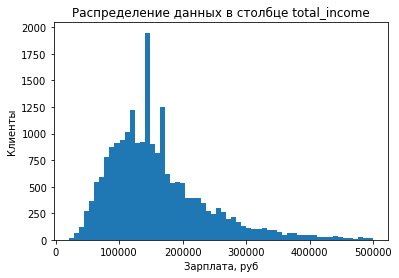

In [37]:
plt.hist(df[df['total_income'] < 500000]['total_income'], bins=60)
plt.title('Распределение данных в столбце total_income')
plt.xlabel('Зарплата, руб')
plt.ylabel('Клиенты')
plt.show()

Распределение зарплат на категории может быть проведено, используя разную логику. Применим функцию qcut() для разделения данных на сопоставимые части:

In [38]:
pd.qcut(df['total_income'], 4)

0        (195767.5, 2265604.0]
1         (107654.5, 142594.0]
2         (142594.0, 195767.5]
3        (195767.5, 2265604.0]
4         (142594.0, 195767.5]
                 ...          
21466    (195767.5, 2265604.0]
21467     (142594.0, 195767.5]
21468    (20666.999, 107654.5]
21469    (195767.5, 2265604.0]
21470    (20666.999, 107654.5]
Name: total_income, Length: 21471, dtype: category
Categories (4, interval[float64]): [(20666.999, 107654.5] < (107654.5, 142594.0] < (142594.0, 195767.5] < (195767.5, 2265604.0]]

Напишем функцию, которая, опираясь на вышеполученные данные определяет уровень дохода в зависимости от величины заработной платы:

In [39]:
def income_level(salary):
    ''' Функция принимает в качестве аргумента величину заработной платы и 
    возвращает уровень заработной платы, используя следующие правила:
    - 'низкий: до 108 т.р.', если зарплата меньше 108000р;
    - 'средний: от 108 т.р. до 143 т.р.', если зарплата от 108000р до 143000р;
    - 'высокий: от 143 т.р. до 200 т.р.', если зарплата от 143000р до 200000р;
    - 'очень высокий: более 200 т.р.', если зарплата выше 200000р;
    - 'неизвестно' во всех других случаях.   
    '''
    
    if salary < 108000:
        return 'низкий: до 108 т.р.'
    elif 108000 <= salary < 143000:
        return 'средний: от 108 т.р. до 143 т.р.'
    elif 143000 <= salary < 200000:
        return 'высокий: от 143 т.р. до 200 т.р.'
    elif salary >= 200000:
        return 'очень высокий: более 200 т.р.'
    else:
        return 'неизвестно'

Создадим новый столбец с указанием уровня дохода 'income_level', применив функцию для определения уровня дохода, которую мы написали выше.
Проверим, все ли ячейки получили определенное значение.

In [40]:
# Создание нового столбца с уровнем дохода путем применения функции income_level.
df['income_level'] = df['total_income'].apply(income_level)

# Проверка уникальных значений.
df['income_level'].unique()

array(['очень высокий: более 200 т.р.',
       'средний: от 108 т.р. до 143 т.р.',
       'высокий: от 143 т.р. до 200 т.р.', 'низкий: до 108 т.р.'],
      dtype=object)

Посмотрим на распределение данных в столбце 'dob_years':

In [41]:
df['income_level'].value_counts()

высокий: от 143 т.р. до 200 т.р.    5501
средний: от 108 т.р. до 143 т.р.    5492
низкий: до 108 т.р.                 5411
очень высокий: более 200 т.р.       5067
Name: income_level, dtype: int64

Данные распределены равномерно.

column : dob_years
min = 0
mean = 43.279074099948765
median = 42.0
max = 75


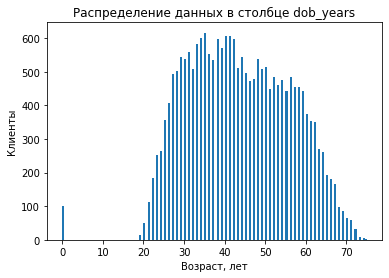

In [42]:
# Применение функции col_check_distrib для столбца dob_years.
col_check_distrib(
    column='dob_years', 
    hist_bins=150, 
    hist_div_factor=1, 
    categories="Возраст, лет", 
    values="Клиенты")

На графике мы видим значения с нулевым показателем - явно это пропуски, заполненные нулями, которые мы не заметили на этапе предобработки. Их меньше 1%, что не оказывает серьезного влияния на расчеты. 

По графику мы видим, что в категории до 18 лет очень мало клиентов и бОльшая часть относится к пропускам, а не к реальному возрасту клиента. Исходя из графика мы можем решить на какие именно возрастные группы есть смысл делить клиентов банка для получения сопоставимых по размеру групп. Для более обоснованного результата посмотрим на результат функции qcut() перед тем, как создавать функцию для категоризации:

In [43]:
pd.qcut(df['dob_years'], 4)

0          (33.0, 42.0]
1          (33.0, 42.0]
2        (-0.001, 33.0]
3        (-0.001, 33.0]
4          (42.0, 53.0]
              ...      
21466      (42.0, 53.0]
21467      (53.0, 75.0]
21468      (33.0, 42.0]
21469      (33.0, 42.0]
21470      (33.0, 42.0]
Name: dob_years, Length: 21471, dtype: category
Categories (4, interval[float64]): [(-0.001, 33.0] < (33.0, 42.0] < (42.0, 53.0] < (53.0, 75.0]]

Примерно основываясь на полученном результате, разделим клиентов на возрастные категории. Для этого создадим функцию, определяющую возрастную группу по возрасту:

In [44]:
def age_group(age):
    ''' Функция принимает в качестве аргумента строку и 
    возвращает возрастную группу по значению возраста age, используя правила:
    - 'до 18', если age < 18 лет;
    - 'от 18 до 35', если age более или равен 18 и менее 35;
    - 'от 35 до 45', если age более или равен 35 и менее 45;
    - 'после 55', если age более или равен 55.
    '''    
    if age < 18:
        return 'до 18'
    elif 18 <= age < 35:
        return 'от 18 до 35'
    elif 35 <= age < 45:
        return 'от 35 до 45'
    elif 45 <= age < 55:
        return 'от 45 до 55'
    elif 55 <= age:
        return 'после 55'

In [45]:
# Создание нового столбца с уровнем дохода путем применения функции income_level.
df['age_category'] = df['dob_years'].apply(age_group)

# Проверка распределения значений.
df['age_category'].count()
df.groupby('age_category')['dob_years'].count()

age_category
до 18           101
от 18 до 35    5969
от 35 до 45    5741
от 45 до 55    4872
после 55       4788
Name: dob_years, dtype: int64

Клиенты разделены на категории по возрасту.

**Вывод**

Произведена категоризация по целям кредита, уровню заработной платы и возрасту клиентов.

In [46]:
# Подсчет уникальных значений education.
df['education'].value_counts()

среднее                15188
высшее                  5251
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

In [47]:
# Создание отдельной таблицы со словарем.
df_edu_dict = df[['education_id', 'education']]

# Удаление дубликатов.
df_edu_dict = df_edu_dict.drop_duplicates()
df_edu_dict

,education_id,education
0,0,высшее
1,1,среднее
13,2,неоконченное высшее
31,3,начальное
2962,4,ученая степень


In [48]:
# Подсчет уникальных значений family_status.
df['family_status'].value_counts()

женат / замужем          12344
гражданский брак          4163
не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: family_status, dtype: int64

In [49]:
# Создание отдельной таблицы со словарем.
df_edu_fam = df[['family_status_id', 'family_status']]

# Удаление дубликатов.
df_edu_fam = df_edu_fam.drop_duplicates()
df_edu_fam

,family_status_id,family_status
0,0,женат / замужем
4,1,гражданский брак
18,2,вдовец / вдова
19,3,в разводе
24,4,не женат / не замужем


Таким образом мы можем создать новую таблицу на основе исходных данных только с теми столбцами, которые нам нужны, имея ввиду, что у нас есть таблица с пояснениями. Например:

In [50]:
df_small = df[['children', 'dob_years', 'days_employed', 'education_id', 'family_status_id', 
              'gender', 'income_type', 'total_income', 'debt', 'purpose_category']]
df_small.head()

,children,dob_years,days_employed,education_id,family_status_id,gender,income_type,total_income,debt,purpose_category
0,1,42,8437,0,0,Ж,сотрудник,253875,0,жилая недвижимость
1,1,36,4024,1,0,Ж,сотрудник,112080,0,автомобиль
2,0,33,5623,1,0,М,сотрудник,145885,0,жилая недвижимость
3,3,32,4124,1,0,М,сотрудник,267628,0,образование
4,0,53,340266,1,1,Ж,пенсионер,158616,0,свадьба


<a id="answer"></a>
## Ответы на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

Создадим сводную таблицу, группируя клиентов по количеству детей и посчитаем процент тех, у кого были задолжности по кредиту в каждой группе.

In [51]:
# Создание сводной таблицы с функцией подсчета количества клиентов с задолжностями и без.
pvt_children = df.pivot_table(index='children', columns='debt', 
                              values='dob_years', aggfunc='count')

# Замена пропусков на 0.
pvt_children[pvt_children.isna()] = 0

# Перевод значений в целочисловой формат.
pvt_children = pvt_children.astype('int')

# Подсчет процента имевших задолжность и сохранение в отдельный столбец.
pvt_children['percentage'] = round(pvt_children[1]/(pvt_children[0] + pvt_children[1])*100, 2)

# Вывод отсортированной по убыванию процентного соотношения таблицы.
pvt_children.sort_values(by='percentage', ascending=False)

debt,0,1,percentage
children,,,
4,37,4,9.76
2,1926,202,9.49
1,4411,445,9.16
3,303,27,8.18
0,13044,1063,7.54
5,9,0,0.00


**Вывод**

Количество клиентов с 4-мя и 5-ю детьми в базе недостаточно, чтобы сделать достоверный подсчет. Явной зависимости между количеством детей и частотой невозврата кредита, на мой взгляд, нет. 
Прослеживается зависимость между двумя группами клиентов: с детьми и без детей. Клиенты с детьми чаще задерживают выплаты по кредиту.

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [52]:
# Создание сводной таблицы с функцией подсчета количества клиентов с задолжностями и без.
pvt_family = df.pivot_table(index='family_status', columns='debt', 
                              values='dob_years', aggfunc='count')

# Подсчет процента имевших задолжность и сохранение в отдельный столбец.
pvt_family['percentage'] = round(pvt_family[1]/(pvt_family[0] + pvt_family[1])*100, 2)

# Вывод отсортированной по убыванию процентного соотношения таблицы.
pvt_family.sort_values(by='percentage', ascending=False)

debt,0,1,percentage
family_status,,,
не женат / не замужем,2536,274,9.75
гражданский брак,3775,388,9.32
женат / замужем,11413,931,7.54
в разводе,1110,85,7.11
вдовец / вдова,896,63,6.57


**Вывод 1**

По результутам этой таблицы мы видим, что чаще всего задолжности имеют незамужние и неженатые клиенты, а реже всего овдовевшие клиенты. В данном случае нужно более подробно посмотреть на данные с разных сторон. Определенно есть связь с возрастом клиентов - незамужние и неженатые клиенты скорее всего моложе овдовевших клиентов. Также, может быть связь с полом клиентов.

Посмотрим на распределение задолжностей по возрастным категориям:

In [53]:
# Создание сводной таблицы с функцией подсчета количества клиентов с задолжностями и без.
pvt_age = df.pivot_table(index='age_category', columns='debt', 
                              values='dob_years', aggfunc='count')

# Подсчет процента имевших задолжность и сохранение в отдельный столбец.
pvt_age['percentage'] = round(pvt_age[1]/(pvt_age[0] + pvt_age[1])*100, 2)

# Вывод отсортированной по убыванию процентного соотношения таблицы.
pvt_age = pvt_age.sort_values(by='percentage', ascending=False)

# Удаление непоказательной строки.
pvt_age = pvt_age.drop(['до 18'], axis=0)
pvt_age

debt,0,1,percentage
age_category,,,
от 18 до 35,5318,651,10.91
от 35 до 45,5267,474,8.26
от 45 до 55,4527,345,7.08
после 55,4525,263,5.49


**Вывод 3**

Прослеживается прямая зависимость между возрастом клиента и возвратом кредита в срок. (Значения в категории "до 18" не отражают действительности, как было показано ранее на графике распределения).

Проверим, есть ли связь между полом клиента и частотой задолжностей:

In [54]:
# Создание сводной таблицы с функцией подсчета количества клиентов с задолжностями и без.
pvt_gender = df.pivot_table(index='gender', columns='debt', 
                              values='dob_years', aggfunc='count')

# Подсчет процента имевших задолжность и сохранение в отдельный столбец.
pvt_gender['percentage'] = round(pvt_gender[1]/(pvt_gender[0] + pvt_gender[1])*100, 2)

# Вывод отсортированной по убыванию процентного соотношения таблицы.
pvt_gender.sort_values(by='percentage', ascending=False)

debt,0,1,percentage
gender,,,
М,6534,747,10.26
Ж,13196,994,7.00


**Вывод 3**

Женщины реже имеют задолжности по кредиту, чем мужчины, несмотря на то, что кредиты женщины берут чаще.

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [55]:
# Создание сводной таблицы с функцией подсчета количества клиентов с задолжностями и без.
pvt_income = df.pivot_table(index='income_level', columns='debt', 
                              values='dob_years', aggfunc='count')

# Подсчет процента имевших задолжность и сохранение в отдельный столбец.
pvt_income['percentage'] = round(pvt_income[1]/(pvt_income[0] + pvt_income[1])*100, 2)

# Вывод отсортированной по убыванию процентного соотношения таблицы.
pvt_income.sort_values(by='percentage', ascending=False)

debt,0,1,percentage
income_level,,,
средний: от 108 т.р. до 143 т.р.,5007,485,8.83
высокий: от 143 т.р. до 200 т.р.,5034,467,8.49
низкий: до 108 т.р.,4980,431,7.97
очень высокий: более 200 т.р.,4709,358,7.07


**Вывод**

По полученным результатам сложно сделать четкие выводы. Мы видим, что клиенты с очень высоким уровнем зарплаты реже всех прочих задерживают выплаты по кредиту. Также мы видим, что чаще всех задерживают выплаты клиенты с зарплатой от 108 до 143 тысяч рублей.

- Как разные цели кредита влияют на его возврат в срок?

In [56]:
# Создание сводной таблицы с функцией подсчета количества клиентов с задолжностями и без.
pvt_purpose = df.pivot_table(index='purpose_category', columns='debt', 
                              values='dob_years', aggfunc='count')

# Подсчет процента имевших задолжность и сохранение в отдельный столбец.
pvt_purpose['percentage'] = round(pvt_purpose[1]/(pvt_purpose[0] + pvt_purpose[1])*100, 2)

# Вывод отсортированной по убыванию процентного соотношения таблицы.
pvt_purpose.sort_values(by='percentage', ascending=False)

debt,0,1,percentage
purpose_category,,,
автомобиль,3905,403,9.35
образование,3644,370,9.22
свадьба,2149,186,7.97
коммерческая недвижимость,1213,99,7.55
жилая недвижимость,8819,683,7.19


**Вывод**

По целям кредита мы видим, что реже всего задерживают выплаты, касающиеся жилой недвижимости. Наиболее часто встречаются задержки по выплатам при взятии кредита на автомобили и образование.

<a id="conc"></a>
## Общий вывод

На основе анализа имеющихся у нас данных, можно заключить следующее:
* количество детей не оказывает влияния на возвращении кредита в срок, однако факт наличия детей повышает риск задолжности;
* есть зависимость между семейным положением и задолжностью по кредиту, но эта зависимость также может объясняться разным возрастом клиентов разного семейного положения: чем старше клиенты, тем чаще они возвращают кредит в срок;
* женщины чаще возвращают кредит в срок, чем мужчины;
* нет четкой зависимости между уровнем зарплаты и задолжностями по кредиту;
* кредиты на жилую недвижимость с точки зрения банка - самые надежные, их чаще всего возвращают в срок, а на автомобили - самые рискованые.